## Working with multiclass classification
When you have more then two classes as an optopn it's know as multi-class classification.


fashion_mnist data set going to use for fashion industries.
https://www.tensorflow.org/datasets/catalog/fashion_mnist



In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#Data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_label)= fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# Check the shape of the simple example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

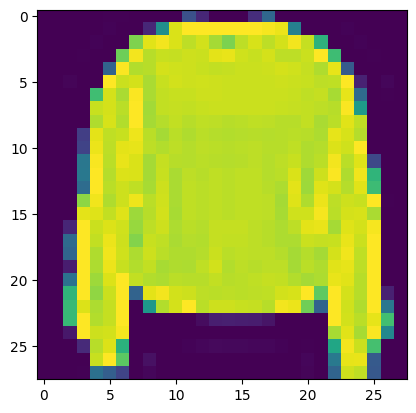

In [8]:
#Plot a single sampel
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [9]:
#Check out sample lable 
train_labels[7]

2

Text(0.5, 1.0, 'Bag')

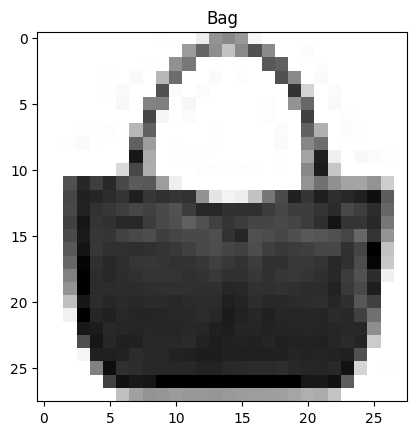

In [13]:
# Create a list so can index training label
class_name=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
index_of_choice=100
#Plot and example image and label
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])


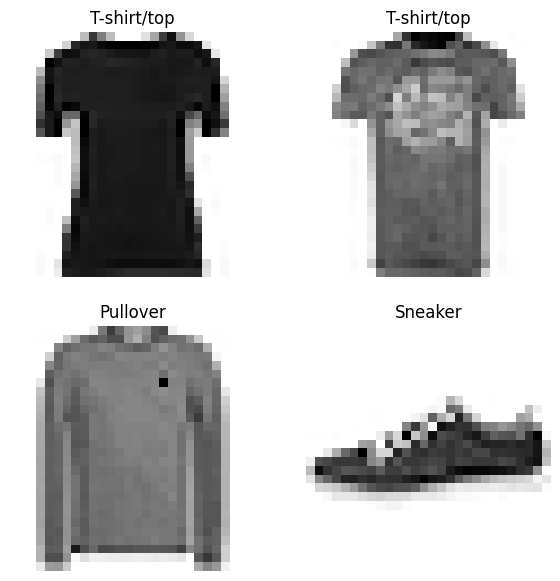

In [17]:
#Plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(7,7))

for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_name[train_labels[rand_index]])
    plt.axis(False)

In [18]:
#Find the input shape of data
train_data[0].shape

(28, 28)

In [19]:
#output layer shape
len(class_name)

10

In [24]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

### Building a multi-class classification model
We can use similar architecture of binary classification, but few tweak required.
* Input Shape = 28X28 (the shape of one image)
* Output Shape = 10 (One per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax


If labels are one-hot encoded, use CategoricalCrossentropy()
If labels are integer form use SparseCategoricalCrossentropy()

In [26]:
# Set random seed
tf.random.set_seed(42)

#Create the model 

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile the model
# model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),      #with SparseCategoricalCrossentropy
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"]
#                 )

#Foir the model
#non_norm_history = model_1.fit(tf.expand_dims(train_data, axis=-1), train_labels, epochs=10, validation_data=(test_data, test_label))

#compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),     
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

#Foir the model
non_norm_history = model_1.fit(tf.expand_dims(train_data, axis=-1), 
                               tf.one_hot(train_labels, depth=10), 
                               epochs=10, 
                               validation_data=(test_data, tf.one_hot(test_label, depth=10)))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3719 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [27]:
#Check the model summary

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#Check the min and max value of training data

train_data.min(), train_data.max()

(0, 255)

* Neural network prefer data to be scaled (or normalized), means it lile to have the numbers in the between 0 and 1.

In [29]:
# We can get our training and testing data betweem 0 & 1 by dividing by the maximum
train_data_norm=train_data/255.0
test_data_norm = test_data/255.0

#check the min and max data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [35]:
# Now our data is normalized, let's build the model

#set the random seed
tf.random.set_seed(42)

#Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model 
norm_history = model_2.fit(tf.expand_dims(train_data_norm, axis=-1), 
            tf.one_hot(train_labels, depth=10), 
            epochs=10,
            validation_data=(test_data_norm, tf.one_hot(test_label, depth=10)))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2415 - accuracy: 0.5158 - val_loss: 0.8966 - val_accuracy: 0.6525
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8055 - accuracy: 0.6881 - val_loss: 0.7689 - val_accuracy: 0.7089
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7171 - accuracy: 0.7247 - val_loss: 0.7126 - val_accuracy: 0.7328
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6772 - accuracy: 0.7422 - val_loss: 0.6878 - val_accuracy: 0.7411
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6564 - accuracy: 0.7499 - val_loss: 0.6783 - val_accuracy: 0.7429
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6422 - accuracy: 0.7582 - val_loss: 0.6703 - val_accuracy: 0.7428
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6327 - accuracy: 0.7596 - val_loss: 0.6702 - val_accuracy:

**Note:** Neural networks tens to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

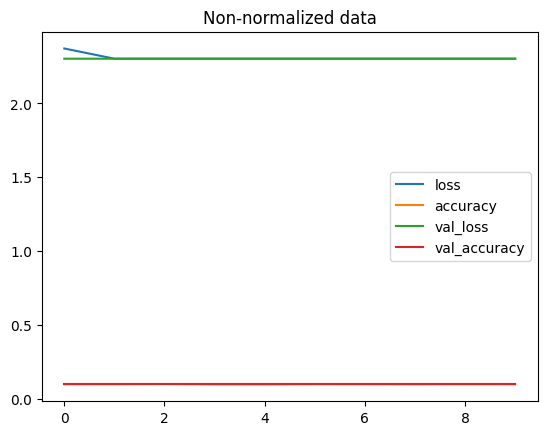

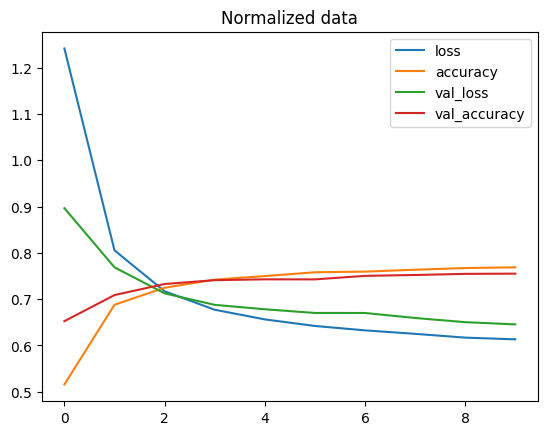

In [37]:
#loss curve
import pandas as pd

#Plot non-norms data loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

#Plot normas data loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** The same model with even slightly different data can produce dramatically different results. So when comparing models it's important to make sure to comparing them on the same criteria.(e.g. same architecture but different data or same data but different architecture.)

### Finding the ideal learning rate

In [40]:
#Set random seed
tf.random.set_seed(42)

#Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Create the leanring rate callbac
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

#Fit the model 
find_lr_history = model_3.fit(tf.expand_dims(train_data_norm, axis=-1), 
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_label),
                              callbacks=[lr_scheduler]) 

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3469 - accuracy: 0.4979 - val_loss: 1.0188 - val_accuracy: 0.5880 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9107 - accuracy: 0.6150 - val_loss: 0.8901 - val_accuracy: 0.6210 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8212 - accuracy: 0.6614 - val_loss: 0.8243 - val_accuracy: 0.6790 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7319 - accuracy: 0.7181 - val_loss: 0.7363 - val_accuracy: 0.7398 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6774 - accuracy: 0.7599 - val_loss: 0.6863 - val_accuracy: 0.7724 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6277 - accuracy: 0.7885 - val_loss: 0.6860 - val_accuracy: 0.7704 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

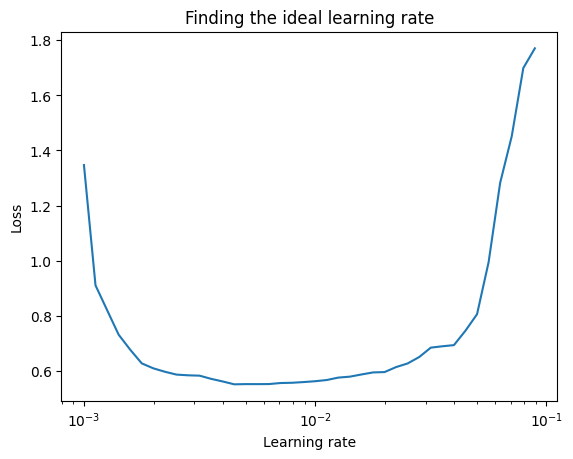

In [42]:
#Plot the learning rate curve
import numpy as np 

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [43]:
10**-3

0.001

In [46]:
#Let's refit the model for ideal leanring rate

#set random seed
tf.random.set_seed(42)

#Create mOdel 
model_4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#Fit the model
model_4.fit(tf.expand_dims(train_data_norm, axis=-1)  , 
            train_labels, 
            epochs=20,
            validation_data=(test_data_norm, test_label)
            )

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0867 - accuracy: 0.6080 - val_loss: 0.6918 - val_accuracy: 0.7500
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6299 - accuracy: 0.7675 - val_loss: 0.6298 - val_accuracy: 0.7706
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5856 - accuracy: 0.7861 - val_loss: 0.6179 - val_accuracy: 0.7678
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5668 - accuracy: 0.7937 - val_loss: 0.5812 - val_accuracy: 0.7888
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5548 - accuracy: 0.7992 - val_loss: 0.5909 - val_accuracy: 0.7854
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5449 - accuracy: 0.8026 - val_loss: 0.5792 - val_accuracy: 0.7888
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5393 - accuracy: 0.8051 - val_loss: 0.5759 - val_accuracy:

### Evaluating our multiclass classification model 
* Evaluate performance using other classification metrics (such as confusion matrix)
* Asses some of it's predictions (through visualization)
* Improve it's results (by training it for longer of changing the architecture)
* Save and export it for use in an application.

In [47]:
#Create a confuction metrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_metrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    #Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes=cm.shape[0]

    #Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)

    #Create a matrix plot
    cax=ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #Set lables to be classes
    if classes:
        labels=classes
    else:
        labels = np.arange(cm.shape[0])

    #Label the axes
    ax.set(title="Confusion matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
    )

    #Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #Adjust the label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    #Set threashold for different colors
    threshold = (cm.max() + cm.min()) / 2

    #plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]* 100: .1f}%)",
        color="white" if cm[i,j] > threshold else "black",
        size=text_size)

In [53]:
#Make some prediction with our model (Predict on same kind of data, on which model was trained)

y_probs = model_4.predict(test_data_norm) #Probs is short for "prediction probabilities"

#View the first 5 prediction
y_probs[0]

313/313 [==============================] - 1s 2ms/step


array([1.0373936e-03, 1.1818883e-08, 4.1627113e-06, 4.1180616e-04,
       4.4537367e-07, 2.1228783e-01, 9.2634167e-05, 8.8785328e-02,
       5.0922614e-02, 6.4645767e-01], dtype=float32)

In [54]:

class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [55]:
class_name[tf.argmax(y_probs[0])]

'Ankle boot'

In [57]:
#Convert all of the prediction probabilites into integers

y_pred = y_probs.argmax(axis=-1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [58]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_label, 
                 y_pred=y_pred)

array([[680,   6,  21,  80,   6,   1, 191,   0,  14,   1],
       [  1, 941,  15,  33,   7,   0,   3,   0,   0,   0],
       [ 11,   3, 669,  10, 191,   0, 110,   0,   6,   0],
       [ 32,  13,   3, 809,  53,   0,  81,   4,   5,   0],
       [  0,   1, 115,  15, 806,   0,  59,   0,   4,   0],
       [  0,   1,   0,   0,   0, 901,   0,  49,  15,  34],
       [123,   6, 147,  48, 166,   0, 496,   0,  14,   0],
       [  0,   1,   0,   0,   0,  35,   0, 916,  10,  38],
       [  1,   1,   8,   7,   3,   3,  31,   2, 944,   0],
       [  3,   0,   0,   0,   0,  15,   0,  45,   9, 928]])

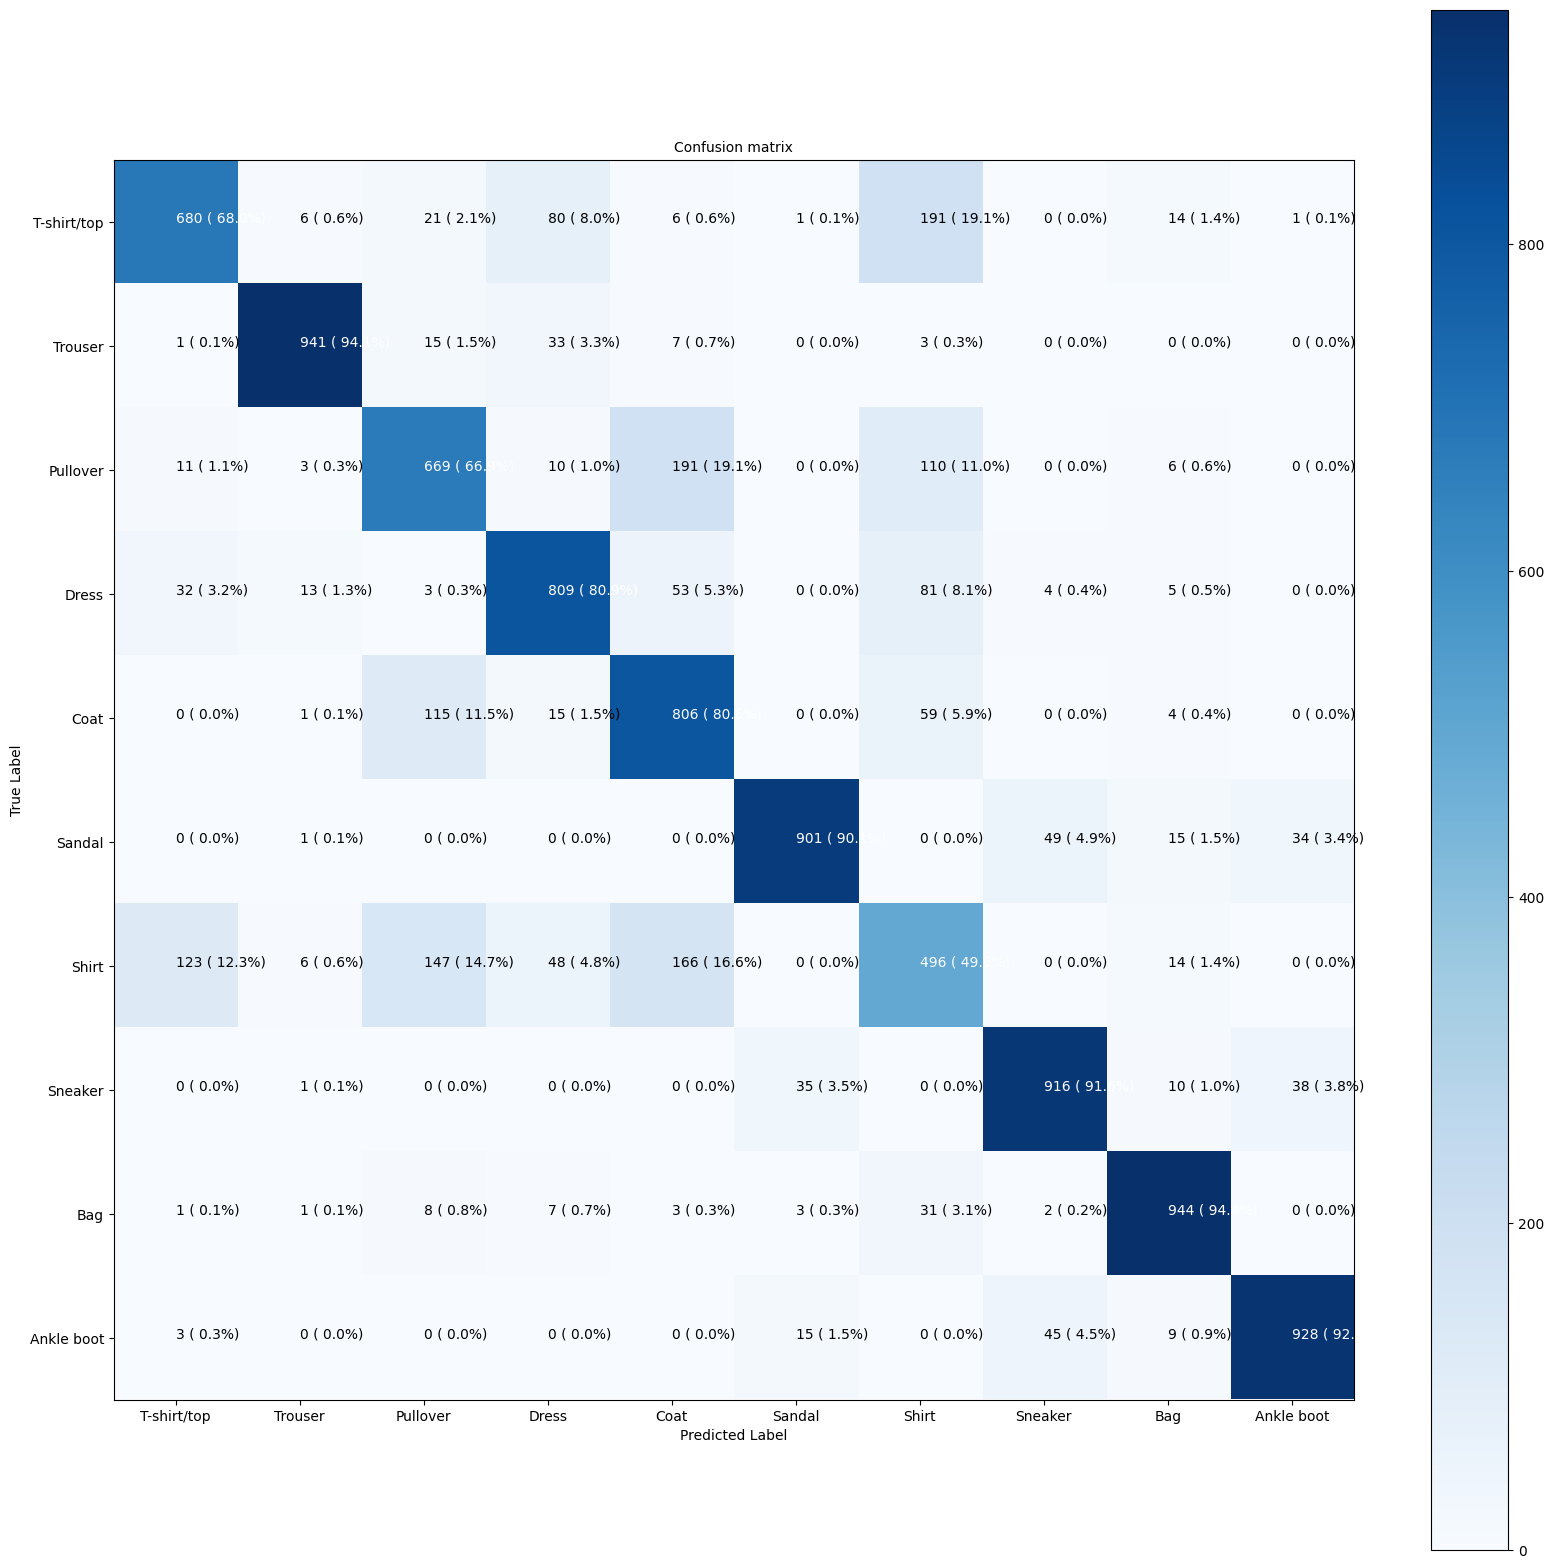

In [62]:
#Make a prettier confusion metrics 
make_confusion_metrix(y_true=test_label,
                      y_pred=y_pred,
                      classes=class_name,
                      figsize=(20, 20),
                      text_size=10)